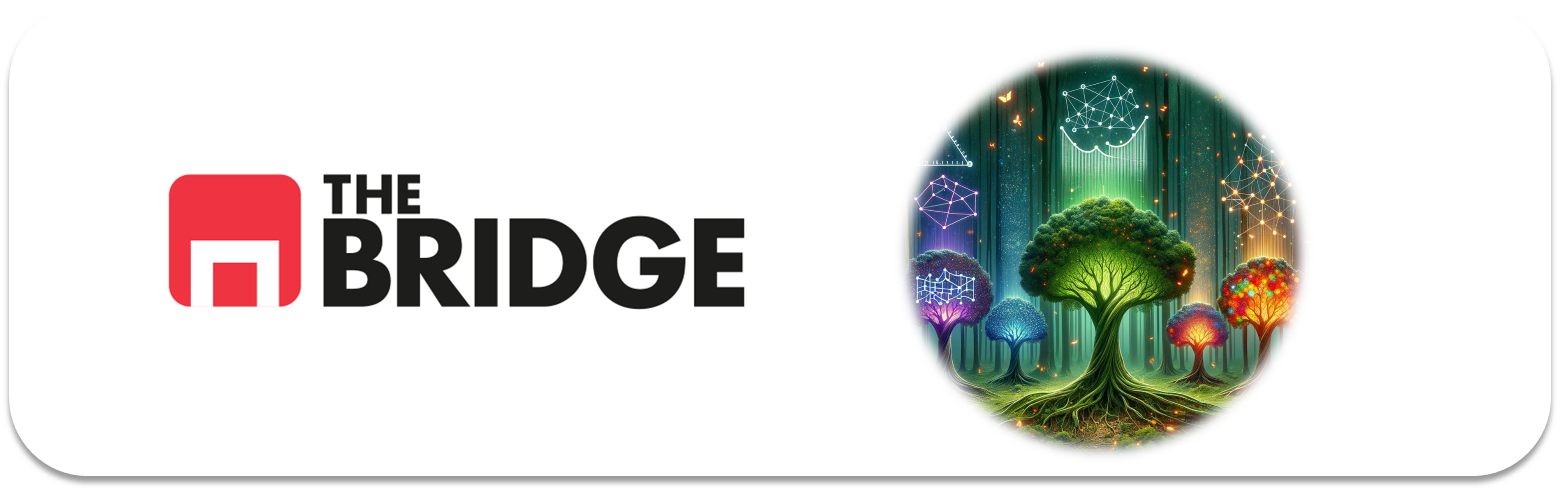

## PRACTICA OBLIGATORIA: **Arboles de Decisión y Ajuste de Hiperparámetros**

* La práctica obligatoria de esta unidad consiste en encontrar el mejor modelo para resolver un problema de predicción de si los destinatarios de una campaña de marketing adquirirán un producto concreto. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from bootcampviztools import pinta_distribucion_categoricas, plot_categorical_relationship_fin, plot_categorical_numerical_relationship
pd.options.mode.copy_on_write = True

### Descripción

En el directorio data encontrarás un dataset que contiene datos relacionados con campañas de marketing directo de una institución bancaria portuguesa (es el dataset "Bank Marketing" de la UCI Machine Learning Repository). Los datos se recopilaron de campañas de marketing telefónico, donde el objetivo principal era predecir si el cliente se suscribiría a un depósito a plazo.

La práctica consiste en completar el proceso de creación de un modelo basado en árboles de decisión que permita predecir si un cliente (dadas unas características similares a las del dataset) "comprará" el depósito a plazo. Sigue los pasos necesarios de un proceso de ML para crear el modelo, optimizar sus hiperparámetros, comparar los resultados de esa optimización con una regresión logística (sin optimizar, con sus hiperparámetros por defecto) y finalmente evaluarlo contra test y hacer una pequeña valoración del resultado obtenido.

Tendrás que hacer la limpieza, split, minieda, selección, tratamiento, primeros entrenamientos, optimización, comparación y evaluación según tu mejor criterio. Eso sí, es obligatorio:
- Identificar el target y analizar su distribución
- Realizar una optimización de hiperparámetros, escogiendo un grid medianemante razonado
- Comparar con el modelo baseline
- Evaluar contra test

AYUDA: La dirección del banco nos proporciona estas notas (en inglés):

 
   **bank client data:**  
   1 - age (numeric)  
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)  
   4 - education (categorical: "unknown","secondary","primary","tertiary")  
   5 - default: has credit in default? (binary: "yes","no")  
   6 - balance: average yearly balance, in euros (numeric)   
   7 - housing: has housing loan? (binary: "yes","no")  
   8 - loan: has personal loan? (binary: "yes","no")   

   **related with the last contact of the current campaign:**  
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")   
  10 - day: last contact day of the month (numeric)  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  12 - duration: last contact duration, in seconds (numeric)    

   **other attributes:**  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  

### 1. Carga del dataset

In [2]:
df = pd.read_csv("./data/bank-full.csv", sep = ";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### 2. Análisis del target

In [4]:
target = "y"
df[target].unique()

array(['no', 'yes'], dtype=object)

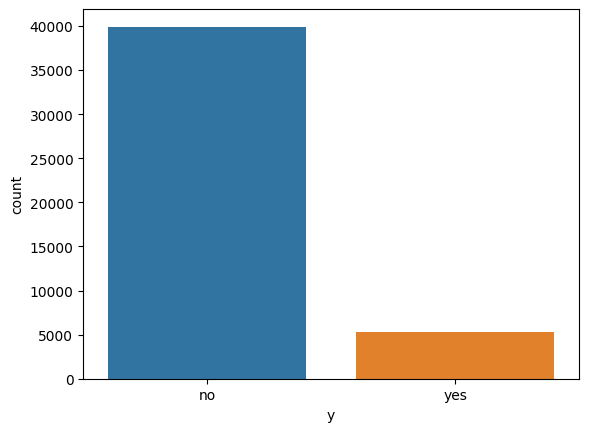

In [5]:
sns.countplot(data = df, x = target, hue = target)
plt.show()

Son muchos más los que no se han suscrito a un depósito a plazo que los que sí, esto puede afectar al accuracy.

### 3. Split Train y Test

In [6]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)

### 4. Mini-EDA

In [7]:
col_cat = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"]
col_num = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]

##### Categóricas vs target

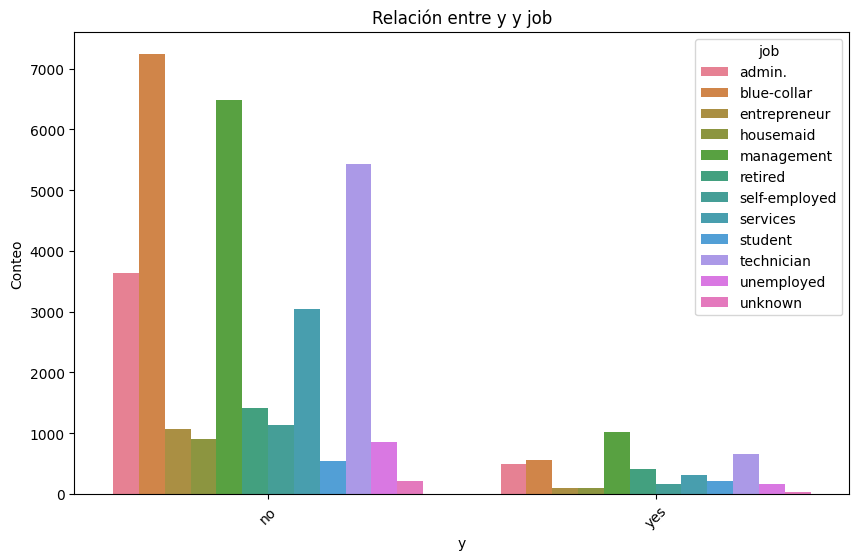

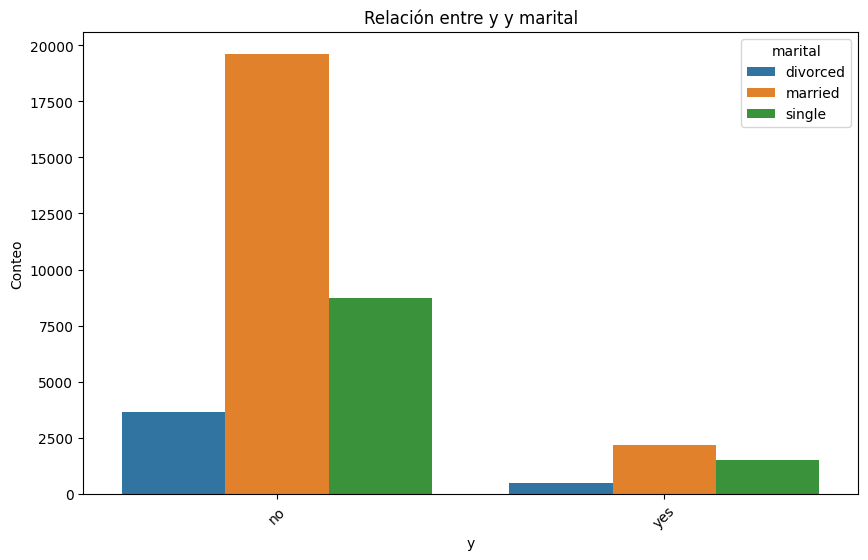

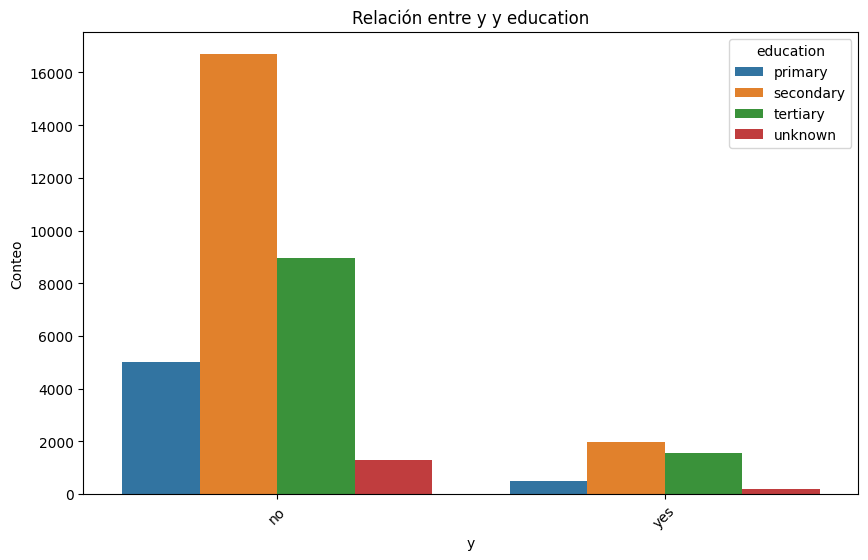

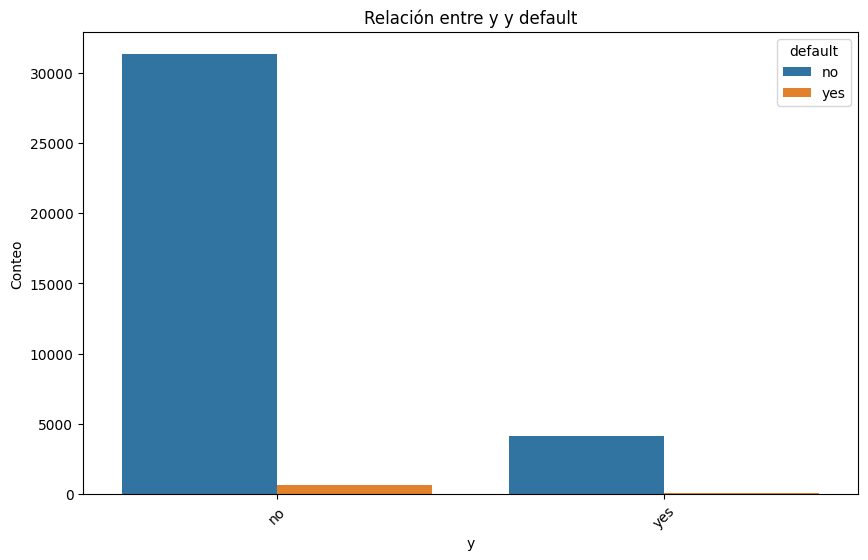

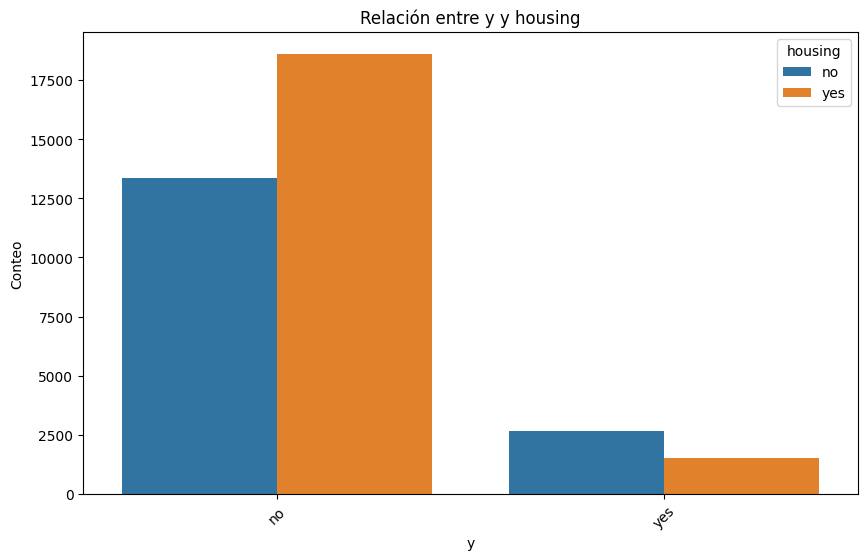

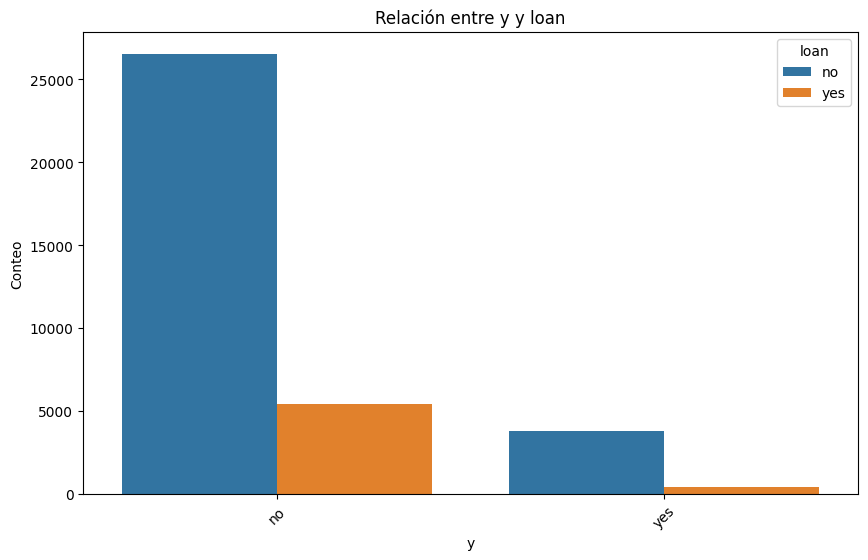

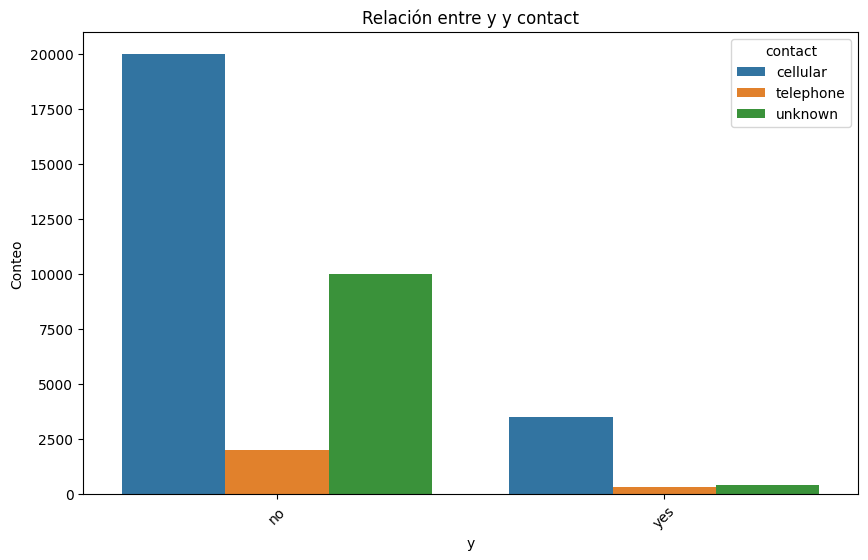

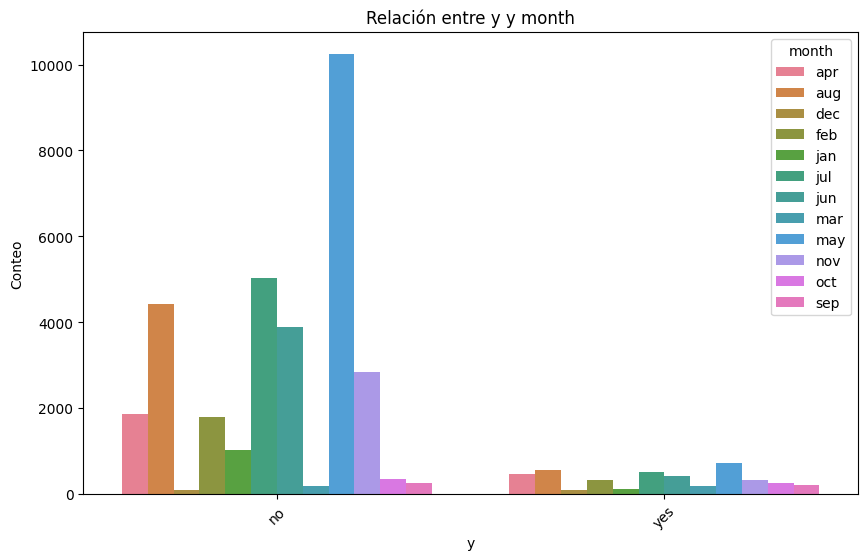

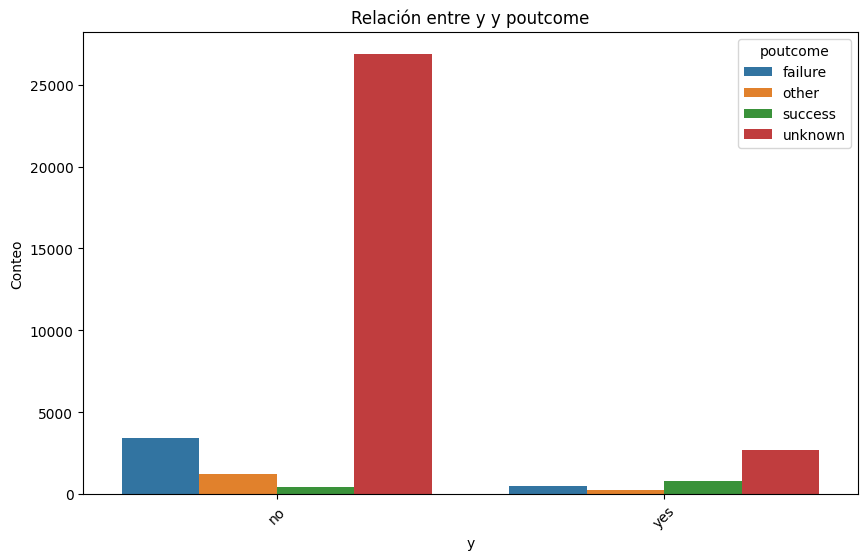

In [8]:
for col in col_cat:
    plot_categorical_relationship_fin(train_set, target, col)

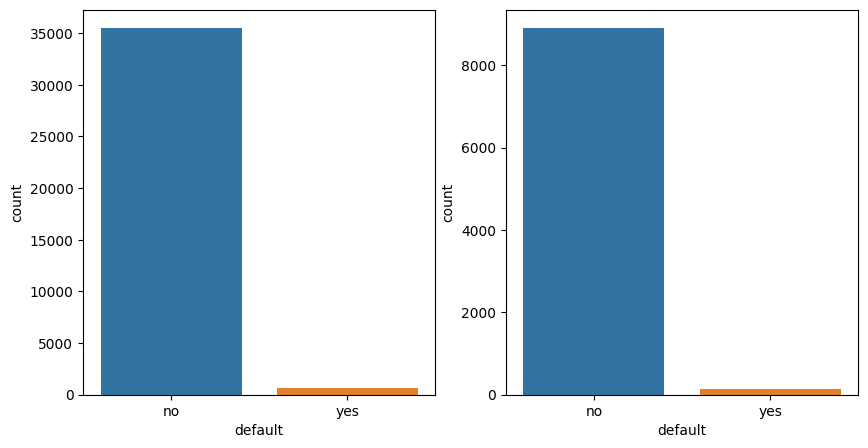

In [9]:
# Compruebo que "default" está bien repartido entre train y test

fig, axs = plt.subplots(nrows= 1, ncols= 2, figsize = (10, 5))

sns.countplot(train_set, x = "default", hue = "default", ax = axs[0])
sns.countplot(test_set, x = "default", hue = "default", ax = axs[1])
plt.show()

In [10]:
# La distribución de "default" está muy desbalanceada, gráficamente no sé si es una buena feature o no, de momento me quedo con todas las categóricas
features_cat = col_cat

##### Numéricas vs target

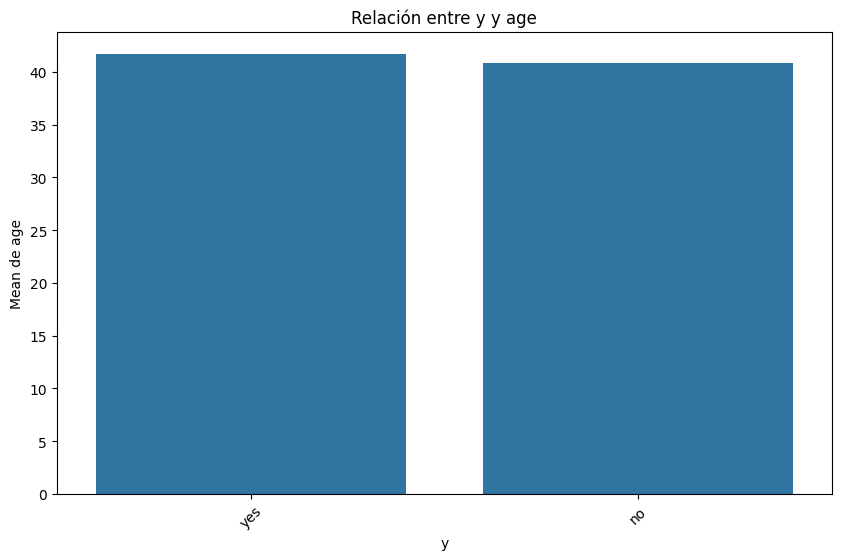

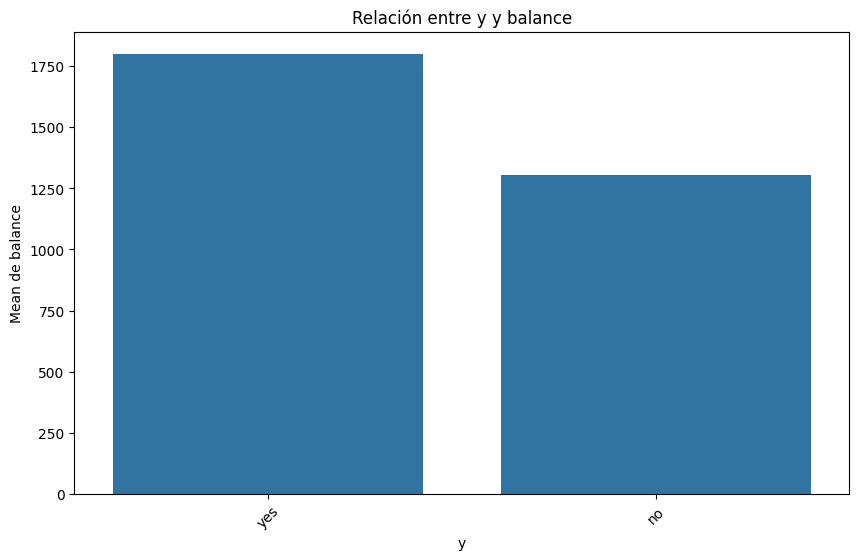

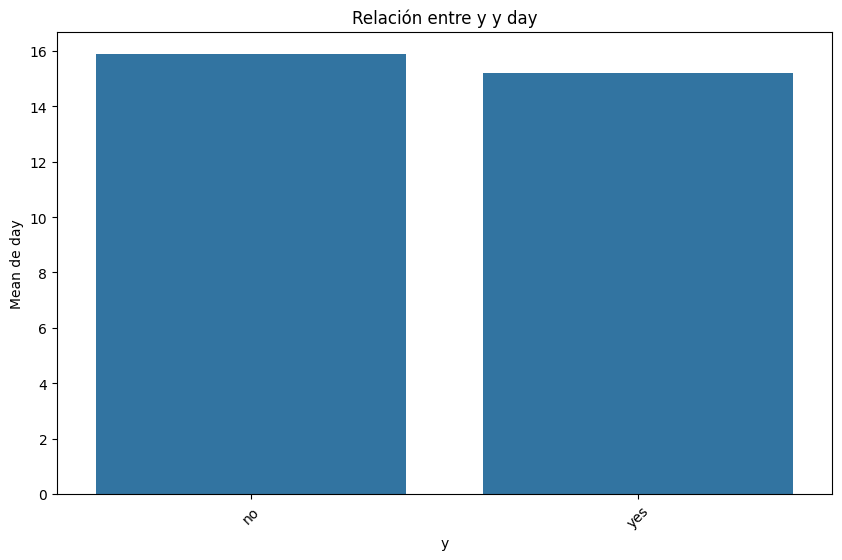

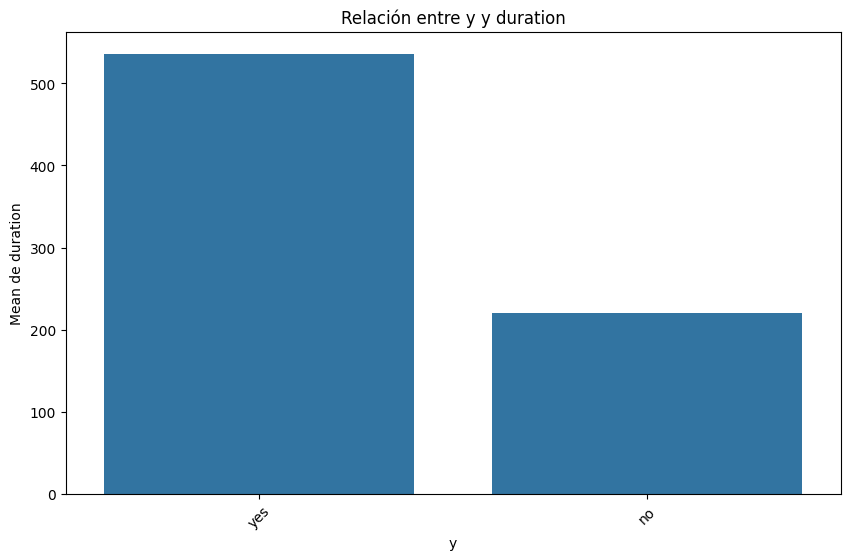

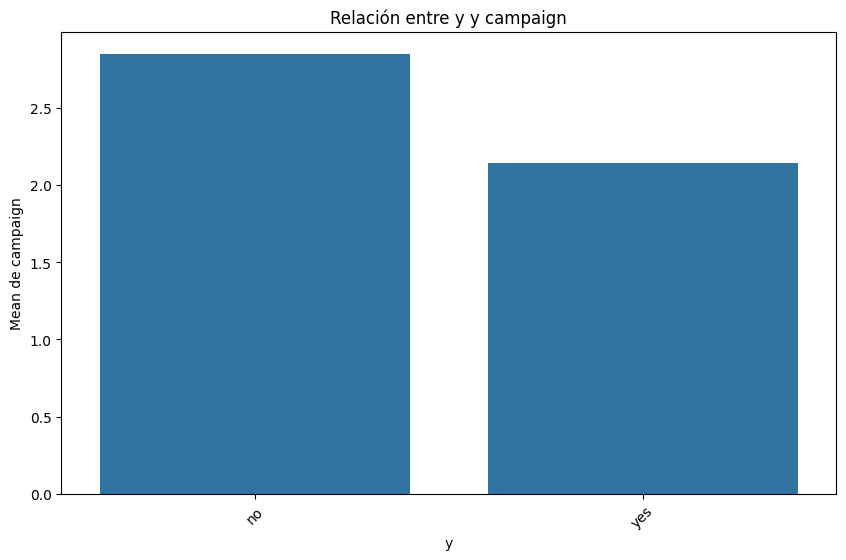

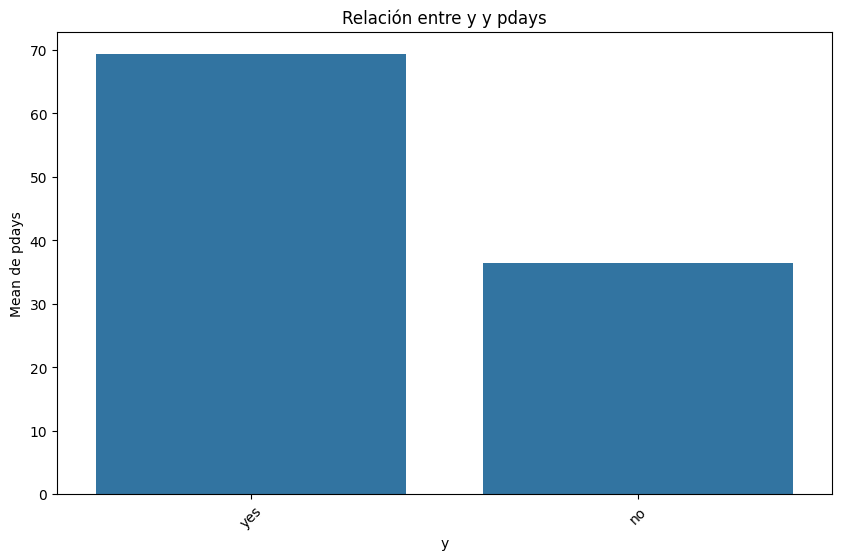

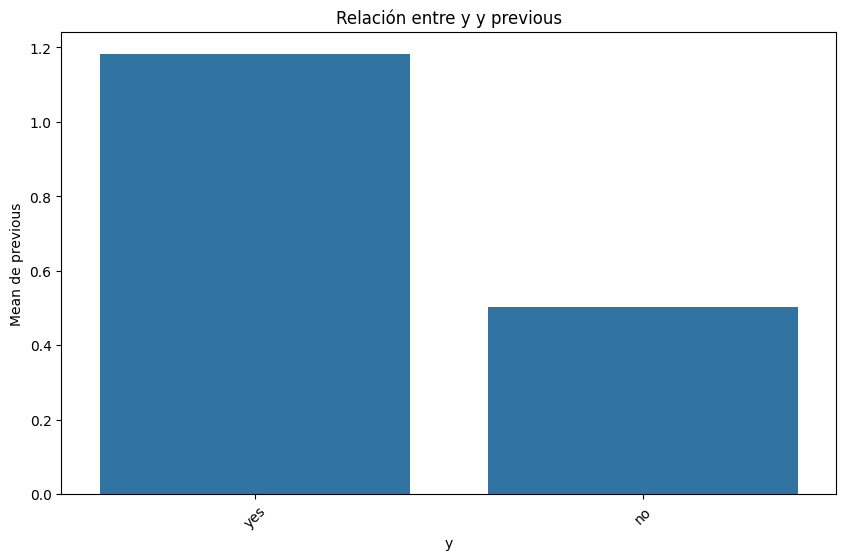

In [11]:
for col in col_num:
    plot_categorical_numerical_relationship(train_set, categorical_col= target, numerical_col= col)

In [12]:
# age y "day" con target muestran distribuciones muy similares, no las cojo como features
features_num = ["balance", "duration", "campaign", "pdays", "previous"]

### 5. Tratar variables

##### Categóricas

In [13]:
features_cat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [14]:
# Binarias: string --> bool --> int
for col in ["default", "housing", "loan"]:
    train_set[col] = train_set[col].astype(bool).astype(int)
    test_set[col] = test_set[col].astype(bool).astype(int)   # Transformo ya test_set también  

In [15]:
# Resto de categóricas
train_set_bck = train_set.copy()
test_set_bck = test_set.copy()

train_set = pd.get_dummies(train_set, columns = ["job", "marital", "education", "contact", "month", "poutcome"], dtype = int)
test_set = pd.get_dummies(test_set, columns = ["job", "marital", "education", "contact", "month", "poutcome"], dtype = int)

##### Numéricas

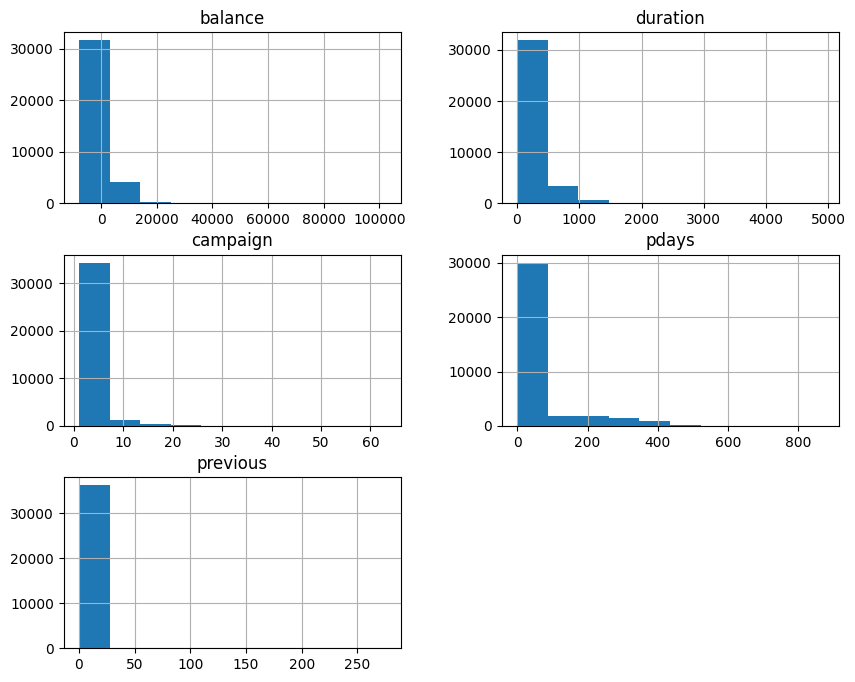

In [16]:
train_set[features_num].hist(figsize=(10, 8));

Las escalas son muy distintas.

In [17]:
train_set["balance"].value_counts().sort_index()

balance
-8019      1
-6847      1
-4057      1
-3372      1
-3313      1
          ..
 64343     1
 66653     1
 71188     1
 81204     2
 102127    1
Name: count, Length: 6652, dtype: int64

Balance tiene muchos valores negativos no puedo aplicar el logaritmo.

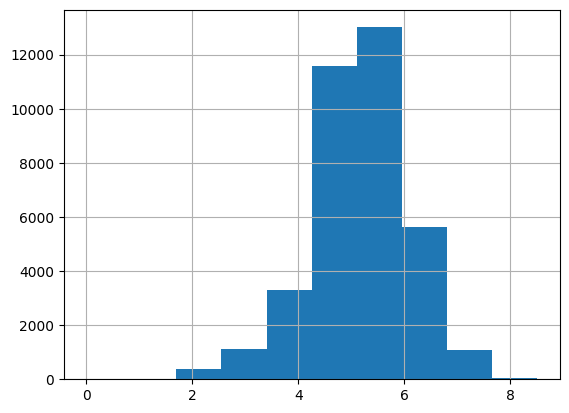

In [18]:
(train_set["duration"] + 1).apply(np.log).hist();

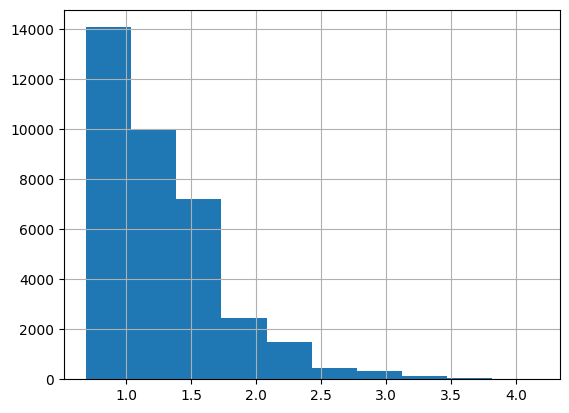

In [19]:
(train_set["campaign"] + 1).apply(np.log).hist();

In [20]:
train_set["pdays"].value_counts().sort_index()

pdays
-1      29556
 1         14
 2         31
 3          1
 4          2
        ...  
 828        1
 831        1
 850        1
 854        1
 871        1
Name: count, Length: 529, dtype: int64

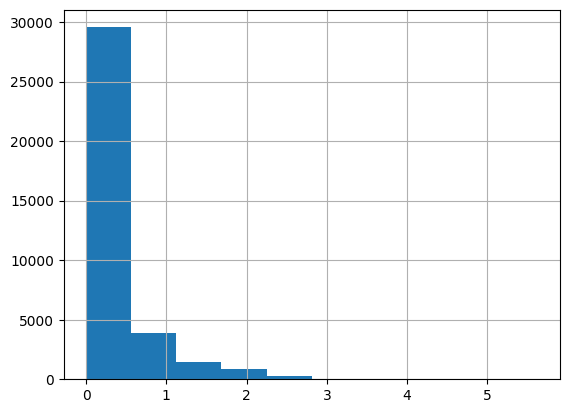

In [21]:
(train_set["previous"] + 1).apply(np.log).hist();

In [22]:
train_set.duration.value_counts().sort_index()

duration
0        2
1        1
2        2
3        4
4       14
        ..
3366     1
3422     1
3785     1
3881     1
4918     1
Name: count, Length: 1493, dtype: int64

In [23]:
for col in ["duration", "campaign", "previous"]:
    train_set[col] = np.log1p(train_set[col])
    test_set[col] = np.log1p(test_set[col])

In [24]:
# Escalado
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features_num_sin_pdays = ['balance', 'duration', 'campaign', 'previous']
train_set[features_num_sin_pdays] = scaler.fit_transform(train_set[features_num_sin_pdays])

In [25]:
test_set[features_num_sin_pdays] = scaler.transform(test_set[features_num_sin_pdays])

In [26]:
train_set[features_num].describe()

,balance,duration,campaign,pdays,previous
count,3.616800e+04,3.616800e+04,3.616800e+04,36168.000000,3.616800e+04
mean,2.828969e-17,3.536211e-16,-1.170879e-16,40.180076,4.911405e-18
std,1.000014e+00,1.000014e+00,1.000014e+00,100.107617,1.000014e+00
min,-3.102851e+00,-5.605773e+00,-9.075872e-01,-1.000000,-4.251237e-01
25%,-4.270686e-01,-5.671983e-01,-9.075872e-01,-1.000000,-4.251237e-01
50%,-3.023598e-01,3.393644e-02,-1.163048e-01,-1.000000,-4.251237e-01
75%,2.247864e-02,6.487275e-01,4.451191e-01,-1.000000,-4.251237e-01
max,3.333264e+01,3.616581e+00,5.855944e+00,871.000000,1.011770e+01


### 6. Modelado

In [27]:
X_train = train_set.drop(columns= target).copy()
y_train = train_set[target]
X_test = test_set.drop(columns= target).copy()
y_test = test_set[target]

In [28]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=10000)

In [49]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state= 42)

In [50]:
# Entreno ambos modelos
log_reg.fit(X_train, y_train)
tree_clf.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

def metrics(model, X, y_target):
    y_pred = model.predict(X)
    ConfusionMatrixDisplay.from_predictions(y_target, y_pred)
    print(classification_report(y_target, y_pred))

              precision    recall  f1-score   support

          no       0.92      0.98      0.95     31970
         yes       0.66      0.35      0.46      4198

    accuracy                           0.90     36168
   macro avg       0.79      0.66      0.70     36168
weighted avg       0.89      0.90      0.89     36168



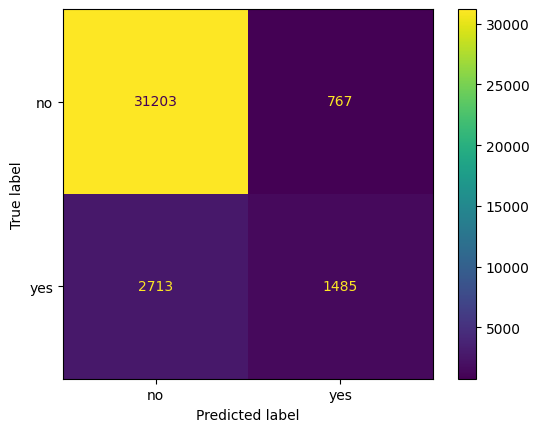

In [32]:
metrics(log_reg, X_train, y_train)

              precision    recall  f1-score   support

          no       0.92      0.98      0.95      7952
         yes       0.66      0.35      0.46      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043



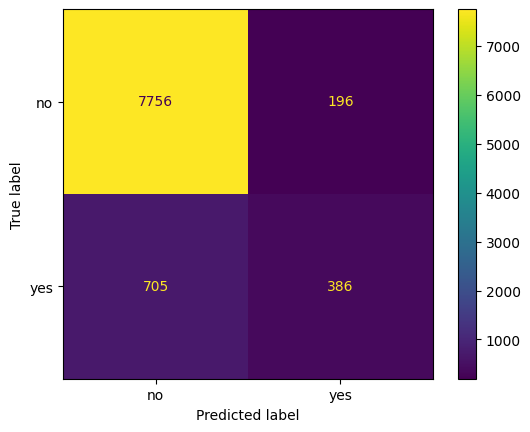

In [33]:
metrics(log_reg, X_test, y_test)

Debido al desbalanceo, los valores positivos de recall y precision son bajos. Mismos valores en test que en train --> generaliza demasiado bien

              precision    recall  f1-score   support

          no       0.93      0.93      0.93      7952
         yes       0.49      0.49      0.49      1091

    accuracy                           0.88      9043
   macro avg       0.71      0.71      0.71      9043
weighted avg       0.88      0.88      0.88      9043



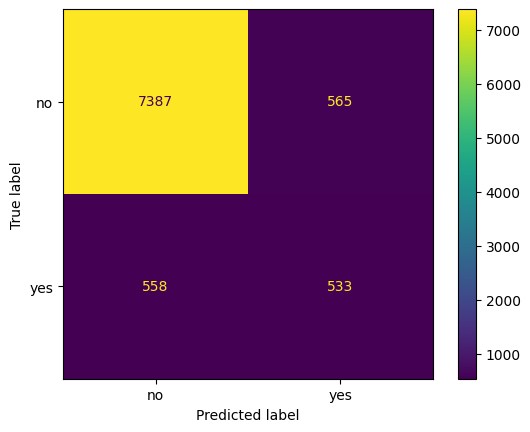

In [60]:
metrics(tree_clf, X_test, y_test)

In [55]:
from sklearn.model_selection import GridSearchCV

param_grid_tree = {
    "max_depth": [2, 5, 10, 15, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10]
}

grid_search_tree = GridSearchCV(tree_clf,
                                param_grid_tree,
                                cv = 5,
                                scoring= "roc_auc",   # uso roc-auc, accuracy no me conviene por el desbalance
                                n_jobs= -1)

grid_search_tree.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",DecisionTreeC...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': [2, 5, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'roc_auc'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;-

In [56]:
grid_search_tree.best_params_

{'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}

In [57]:
grid_search_tree.best_score_ # best score del train

np.float64(0.8663354246310753)

Generaliza bien

In [58]:
# en test
grid_search_tree.best_estimator_.score(X_test, y_test)

0.8970474400088466

Similar al de regresión logística.

Conclusión: El árbol de decisión optimizado detecta algo mejor los que contratan el depósito (mayor recall).